## [pandas_profiling](http://nbviewer.jupyter.org/github/JosPolfliet/pandas-profiling/blob/master/examples/meteorites.ipynb)
dfを入力値にして、データの概要を俯瞰できる。   
  
```
pip install pandas-profiling
```

In [1]:
# pandas_profilingの使い方
import pandas as pd
import pandas_profiling
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pandas_profiling.ProfileReport(df)

Number of variables,4
Number of observations,150
Total Missing (%),0.0%
Total size in memory,4.8 KiB
Average record size in memory,32.5 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [2]:
# HTMLでの出力
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile='ProfileReport.html')

### csvファイルを入力値としたい時は、pythonスクリプトで実行できる。
$ python profile_csv.py input.csv -o out.html

---
## [PixieDust](https://qiita.com/ishida330/items/53f1b0df2247fab5c6dd)  
matplotlibやbokeh, seabornなどデータ可視化ツールの仕様の違いを吸収した統合可視化クラス  
以下のたった数行でインタラクティブな環境が得られる。
  
```  
pip install pixiedust  
```
```
import pandas as pd
import pixiedust  
df = pd.read_csv()  
display(df)  
```  

### [データ・ラングリング](https://medium.com/ibm-watson-data-lab/wrangle-data-in-jupyter-notebooks-with-pixiedust-rosie-7d9ac1129925)

```
pip install pixiedust_rosie
```

In [ ]:
import pixiedust_rosie
pixiedust_rosie.wrangle_data(df)

### PixieDebugger  
以下のマジックコマンドを任意の位置に挿入することでpdbばりのデバッグができるようになる。  
```
%%pixie_debugger
```

### PixieDustでいくつかはまった点
- pixiedust_rosieを使おうとした時、インポートできなかった。pipでインストールするのか、方法を検討する必要がありそう。
- PixieApps: Share機能でWebApp化を試みた際、Please check that PixieGateway server http://104.154.63.249:81 is reachableと言われた。  
PixieGateway serverについてググる必要がありそう。

---
## 対話型インタフェースのipywidgets
- interact()をデコレータとして使うことで簡単にスライダを実装できる。
- interact()は簡単にスライダを実装できるが、内部的にはipywidgets.IntSliderなどのウィジェットなるクラスを呼び出している。
- ウィジェットのイベントハンドラを活用しよう
- ウィジェットのレイアウトのオプション

|設定値|説明|
|:-:|:-:|
|HBox|横並びに整列|
|VBox|縦並びに整列|
|Accordion|アコーディオン表示|
|Tabs|タブ表示|

In [1]:
# 整数のスライダを作る←interact関数の引数に整数を与える。
from ipywidgets import interact

@interact(n=5)
def f(n):
    return n

In [2]:
# 様々なスライダを作る。←interact関数の引数に対応する型を与える。今回は、int, float, str, list, bool値。
@interact(i=1, f=0.1, s='text', l=['a', 'b'], is_checked=True)
def f(i, f, s, l, is_checked):
    return i, f, s, l, is_checked

In [4]:
# 明示的にクラスを指定して渡す。:FloatSlider, IntSlider
from ipywidgets import IntSlider, FloatSlider
import numpy as np

rate_slider = FloatSlider(min=-1, max=5, step=0.1, value=2, description='金利')
nper_slider = IntSlider(min=1, max=35, step=1, value=20, description='返済期間')
pv_slider = IntSlider(
    min=5000000,
    max=50000000,
    step=1000000,
    value=20000000,
    description='返済金額')

@interact(rate=rate_slider, nper=nper_slider, pv=pv_slider)
def pmt(rate, nper, pv):
    rate = rate * 0.01 / 12
    nper = nper * 12
    payment = abs(int(np.pmt(rate, nper, pv)))
    print('月々の返済額:{:,d}円'.format(payment))
    print('総返済額:{:,d}円'.format(payment * nper))

In [5]:
# 使用可能なウィジェットの表示方法
from ipywidgets import Widget
from pprint import pprint

pprint(Widget.widget_types)

{'Jupyter.Accordion': <class 'ipywidgets.widgets.widget_selectioncontainer.Accordion'>,
 'Jupyter.BoundedFloatText': <class 'ipywidgets.widgets.widget_float.BoundedFloatText'>,
 'Jupyter.BoundedIntText': <class 'ipywidgets.widgets.widget_int.BoundedIntText'>,
 'Jupyter.Box': <class 'ipywidgets.widgets.widget_box.Box'>,
 'Jupyter.Button': <class 'ipywidgets.widgets.widget_button.Button'>,
 'Jupyter.ButtonStyle': <class 'ipywidgets.widgets.widget_button.ButtonStyle'>,
 'Jupyter.Checkbox': <class 'ipywidgets.widgets.widget_bool.Checkbox'>,
 'Jupyter.ColorPicker': <class 'ipywidgets.widgets.widget_color.ColorPicker'>,
 'Jupyter.Controller': <class 'ipywidgets.widgets.widget_controller.Controller'>,
 'Jupyter.ControllerAxis': <class 'ipywidgets.widgets.widget_controller.Axis'>,
 'Jupyter.ControllerButton': <class 'ipywidgets.widgets.widget_controller.Button'>,
 'Jupyter.DatePicker': <class 'ipywidgets.widgets.widget_date.DatePicker'>,
 'Jupyter.Dropdown': <class 'ipywidgets.widgets.widget_s

In [18]:
# イベントのハンドリング
# ①クリックした時に起動する関数（下記ではon_button_clicked()のこと）を作成する。
# ②ウィジェットのインスタンス（下記ではb=Button()のこと）を作成する。
# ③②のイベントメソッド（下記では.on_click()のこと）を実行し、引数に①を渡す。
# ④display()関数に②のインスタンスを渡す。
from ipywidgets import Button
from IPython.display import display, clear_output
from datetime import datetime

def on_button_clicked(b):
    clear_output() #既にある出力を削除
    print('{:%Hh%Mm%Ss}です'.format(datetime.now()))
    
b = Button(description='今何時？')
b.on_click(on_button_clicked)
display(b)

20h35m15sです


In [19]:
# ウィジェットのレイアウト:HBox, VBox, Accordion, Tabs
from ipywidgets import HBox, VBox, Text, Dropdown

w1 = Text(value='Text')
w2 = Button(description='Button')
w3 = Dropdown(options=['1', '2'])
w4 = IntSlider()

VBox([HBox([w1, w2]), HBox([w3, w4])])

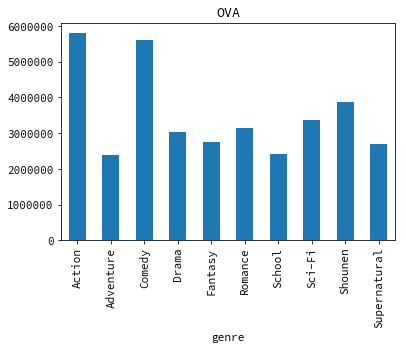

In [23]:
# 可視化ツール（matplotlib）との連携
# 下記例では、typeカラムを選択すると、そのtypeのgenre毎のmembersを棒グラフに表示する。
import os
import pandas as pd
import matplotlib.pyplot as plt

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_genre_top10_csv = os.path.join(base_url, 'anime_genre_top10.csv')
top10_df = pd.read_csv(anime_genre_top10_csv)

def plot_genre_members(b):
    clear_output()
    filter_by_type = top10_df.loc[top10_df['type'] == types.value]
    plot_data = filter_by_type.groupby('genre').sum()['members']
    ax = plot_data.plot.bar()
    ax.set_title(types.value)
    plt.show()
    
types = Dropdown(options=list(top10_df['type'].unique()))
submit_button = Button(description='グラフを表示')
submit_button.on_click(plot_genre_members)

HBox([types, submit_button])

↓より簡単な解説

In [ ]:
from __future__ import print_function
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
def f(x):
    print(x)

In [25]:
# 整数を渡すとスライダー
interact(f, x=10);

In [26]:
# 真偽値を渡すとチェックボックス
interact(f, x=True);

In [27]:
# 文字列を渡すとテキストエリアを生成する
interact(f, x=u"こんにちは世界！");

In [28]:
# デコレータ
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y);

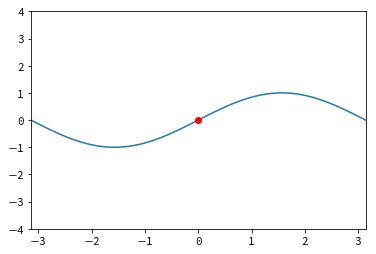

In [29]:
@interact(amp=(0.1, 4.0, 0.1), omega=(0.1, 4.0, 0.1), phase=(-np.pi, np.pi, 0.1), 
          fn = {'sin': np.sin, 'cos': np.cos, 'tan': np.tan})
def h(amp=1.0, omega=1.0, phase=0.0, fn=np.sin):
    domain=[-np.pi, np.pi]
    x = np.linspace(domain[0], domain[1], 100)
    y  = amp * fn(omega * x + phase)
    plt.plot(x, y)
    plt.plot(-phase/omega, 0, 'or')
    plt.xlim(domain)
    plt.ylim([-4, 4])